In [ ]:
#src == 來源圖物件
#dst == 目標/輸出圖物件

#邊緣檢測函數
#cv2.CV_8U == dtype: np.uint8
#cv2.Laplacian(src, dtype, dst, K值)
#cv2.Sobel() #尚未讀過
#cv2.Scharr() #尚未讀過
#以上的邊緣檢測容易被噪點誤導, 需要自己先模糊化/去噪/二值化等過程後才做檢測
#cv2.Canny(src, treshold1, treshold2) #最省事的方法,自帶去噪,使用double treshold剔除false positive,檢測並消除不明顯邊緣

#模糊化函數, K越大越模糊
#cv2.Blur(圖物件, K值) #簡單模糊
#cv2.medianBlur(圖物件, K值) #中位數模糊,對處理影片雜訊點較有效,特別是彩色影像
#cv2.GaussianBlur(圖物件, K值) #高斯模糊

#cv2.filter2D(src, dtype, kernel, dst) #卷積濾波器, 可自訂kernel
#dtype若為-1表示src與dst用相同的dtype
#filter2D對3通道都使用同一個kernel
#若要使用不同kernel, 需要先用cv2.split(src)分離通道處理過, 在用cv2.merge(通道,dst)

In [76]:
import cv2
import numpy as np
import utils

#模糊化>灰階>Laplacian邊緣檢測
#src輸入的圖物件, dst輸出的圖物件
def strokeEdges(src, dst, blurKsize, edgeKsize):
    if blurKsize >= 3:
        blurredSrc = cv2.medianBlur(src, blurKsize)
        graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
    else:
        graySrc = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize = edgeKsize) #Laplacian邊緣檢測
    normalizedInverseAlpha = (1.0/255)*(255-graySrc) # 正規化, 修正成0~1之間的float, 當weight使用
    channels = cv2.split(src) #將通道分離
    for channel in channels:
        channel[:] = channel * normalizedInverseAlpha
    output = cv2.merge(channels, dst) #將通道組合回去
    return output

def pickup(src):
    #blurred_src = cv2.GaussianBlur(src, (11,11), 0)
    
    blurred_src = cv2.medianBlur(src, 7)
    return src - blurred_src

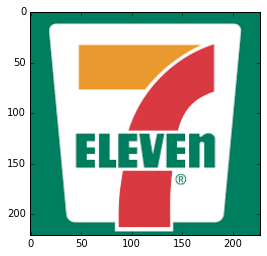

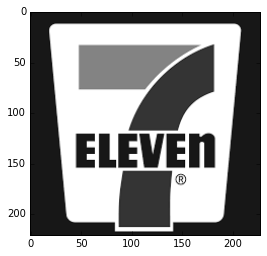

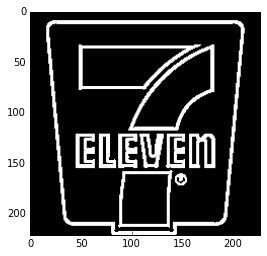

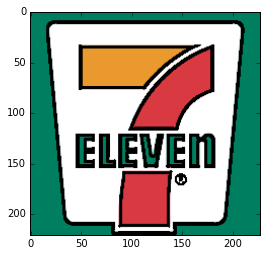

In [43]:
#strokeEdges的分段測試
from matplotlib import pyplot as plt
%matplotlib inline
path = '7-11-logo-2.png'
src = cv2.imread(path) #原圖
src_RGB = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.imshow(src_RGB)
plt.show()

blurredSrc = cv2.medianBlur(src, 1) #模糊化+灰階
graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
plt.imshow(graySrc, 'gray')
plt.show()

cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, 7) #Laplacian邊緣檢測
plt.imshow(graySrc, 'gray')
plt.show()

normalizedInverseAlpha = (1.0/255)*(255-graySrc)
#print normalizedInverseAlpha

channels = cv2.split(src)
#print channels

for channel in channels:
    channel[:] = channel * normalizedInverseAlpha
#    print channel
dst = cv2.merge(channels, src)

#dst = strokeEdges(src, src, 7, 7)
dst_RGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(dst_RGB)
plt.show()

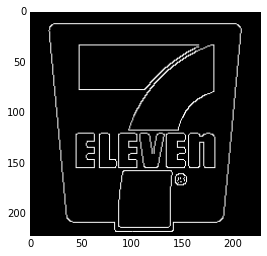

In [46]:
path = '7-11-logo-2.png'
src = cv2.imread(path) #原圖
dst = cv2.Canny(src, 200, 300) #用Canny
plt.imshow(dst, 'gray')
plt.show()